<center>
    <h1> ILI286 - Computación Científica II </h1>
    <h2> Tarea 5 </h2>
    <h2> [S]cientific [C]omputing [T]eam </h2>
</center>

_Marzo 2017_

# Tabla de Contenidos
* [1.- Objetivos](#obj)
* [2.- Uso de widgets](#widgets)
* [3.- Ecuación de calor en 2D](#heateq)
* [4.- Aplicación de la ecuación de calor en imágenes](#heateq-image)
* [5.- Otra aplicación de la ecuación de calor](#revheateq-image)
* [6.- Instrucciones](#instr)

<div id='obj' />
# 1. Objetivos

Los objetivos de esta tarea son:

* Estudio de las técnicas basadas en diferencias finitas.
* Aplicación de diferencias finitas en un problema con 3 dimensiones (2 espaciales y 1 temporal).
* Resolución de la ecuación de calor y aplicación en el procesamiento de imágenes.

<div id='widgets' />
# 2. Uso de widgets

A continuación se muestra un ejemplo de como utilizar los <i>widgets</i>.

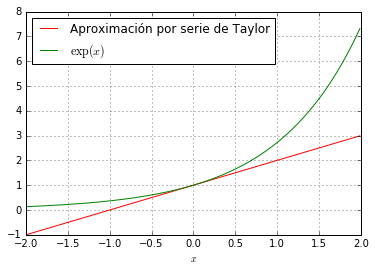

In [2]:
# Libraries
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from scipy.misc import factorial
import matplotlib.pyplot as plt

# Exponential function
X = np.arange(-2, 2, 0.01)
Y = np.exp(X)

def using_widget(k):
    fig = plt.figure()
    x = np.arange(-2, 2, 0.01)
    y = np.zeros(x.shape)
    # Approximation by Taylor Series
    for i in range(0,k+1):
        y = y + x**i/factorial(i)
    plt.plot(x,y, 'r',label='Aproximación por serie de Taylor')
    plt.plot(X, Y, 'g',label='$\exp(x)$')
    plt.legend(loc='best')
    
    plt.grid(True)
    plt.xlabel('$x$')
    plt.show()

interact(using_widget, k=widgets.IntSlider(min=1,max=20,step=1,value=1))

<div id='heateq' />
# 3. Ecuación de calor en 2D (30 pts)

Considere la siguiente ecuación diferencial parcial, correspondiente a la ecuación de calor definida en un dominio $(x,y) \in [0,10]^2$ y $0 < t < T_{\max}$:

\begin{align}
u_t &= \alpha\, \Delta u \\
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1) \\
u(x,y,0) = f(x,y) &= \dfrac{x\,y\,(x-10)\,(y-10)}{x+3}, \quad (x,y) \in [0,10]^2
\end{align}

donde $u(\Gamma, t)$ es la función $u$ evaluada en la frontera $\Gamma$ del dominio y $\dfrac{\partial u}{\partial \mathbf{n}}$ es el gradiente de $u$ producto punto el vector normal $\mathbf{n}$ apuntando hacia fuera del dominio.

1. Aplique diferencias finitas en la <i>PDE</i> y expréselo en términos de los índices $i,j,k$ al aplicar un esquema explícito, donde $i$ está relacionado con la discretización de la variable $x$, $j$ está relacionado con la variable $y$ y $k$ está relacionado con el tiempo $t$.

2. Determine el tipo de condición de frontera del problema. Explique como utilizar esta condición y la condición inicial para resolver numéricamente el problema. Además indique qué significa que $c = 0$ y $c = 1$.

3. Construya el código para resolver el problema. Aplique operaciones vectorizadas. Tenga en consideración los problemas de estabilidad que podrían surgir de los valores de $\Delta x, \Delta y, \Delta t$. Considere $\alpha = 1$ y un $T_\max = 5$.

4. Su solución debería ser un "cubo" de tamaño $(N_x, N_y, N_t)$. Muestre gráficamente mediante <i>widgets</i> con 2 <i>slides</i> la solución encontrada (donde el primer <i>slide</i> modifica el momento $t$ visualizado y el segundo <i>slide</i> modifica el coeficiente $c$ de la condición). Use un gráfico 3D para visualizar la forma de la solución.

<div id='heateq-image' />
# 4. Aplicación de la ecuación de calor en imágenes: <i> Blurring </i> (40 pts)

La ecuación de calor logra una difusión, en base a las condiciones entregadas. Aplicado en imágenes logramos un efecto de <i> blur </i> en la imagen. Consideremos el siguiente problema:

\begin{align}
    u_t &= \alpha\,\Delta u \\
    u(x,y,0) &= I(x,y) \\
    c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1)
\end{align}

donde $I(x,y)$ es una imagen. Consideremos $\alpha = 1$ por simplicidad.

1. Cargue la imagen <i>mandrill.png</i> (adjunta en esta tarea) como escala de grises, normalice sus valores (respecto a la escala de grises) y transfórmela a un <i>array</i> de <i>Numpy</i>. Visualice la imagen y su dimensión.

2. Programe una función que resuelva la ecuación de calor propuesta. Para este punto es importante considerar algunos aspectos:
    * La ecuación se resuelve sobre un dominio, y sobre este dominio debemos aplicar valores $\Delta x, \Delta y$ que se estimen convenientes. Para este problema el dominio es entregado por la imagen, por lo que tenemos cierta "flexibilidad" para escogerlo. Si la dimensión de la imagen es $(N,M)$ entonces pueden tomarse, convenientemente, el dominio espacial como $[0,N-1]\times[0,M-1]$ y con esto tomar $(N,M)$ puntos equiespaciados por $\Delta x = 1, \Delta y = 1$. Es decir estamos tomando como cada punto de la "discretización" como un píxel de la imagen.
    * Recuerde que la imagen representa su función de condición inicial. Dado lo explicado anteriormente, si generamos $N$ y $M$ puntos y denotamos la imagen por $I(x,y)$, tenemos que $I(x_i,y_j)$ equivale al píxel $(i,j)$ (recordar que estamos tomando $\Delta x = 1, \Delta y = 1$.
    * Tenga en consideración los valores necesarios para que el problema sea estable.
    * El efecto de blur es progresivo. Considerando que $t$ está acotado por $0 < t \leq T_\max$, esto quiere decir que mientras más grande sea $T_\max$, más tiempo se está entregando para que la imagen se vea afectada por el efecto de <i>blur</i>. Para visualizar esto considere $T_\max = 30$.

4. Aplique su código a la imagen. Luego de obtener la solución utilize un <i> widget </i> con dos <i>slides</i>: el primero para visualizar la imagen en cada tiempo obtenido y el segundo variando el parámetro $c \in (0,1)$. ¿Se consigue el efecto de <i> blur </i> en la imagen?.

5. Explique el efecto del parámetro $c$ en la imagen. ¿cuál es el $c$ óptimo para obtener un buen efecto de <i>blur</i>?.

<div id='revheateq-image' />
# 5. Otra aplicación de la ecuación de calor: <i> Deblur </i> (30 pts)

En la sección anterior pudo aplicar la ecuación de calor a una imagen. **¿Será este proceso reversible?**. Dicho de otra manera, si tengo una imagen con <i>blur</i>, ¿puedo recuperar la imagen original?. Este problema se plantea de la siguiente manera:

\begin{align}
u_t &= \alpha\, \Delta u\\
u(x,y,\tau) &= I_\tau(x,y)\\
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1)
\end{align}

donde $I_\tau(x,y)$ es la imagen procesada o con efecto <i>blur</i>. Esto es un problema de valor final --- recuerde
que nosotros hemos trabajado problemas de valor incial. En este contexto, tenemos que $\tau$ es el tiempo en cuestión (tiempo hasta donde avanzó la ecuación de calor). Entonces estamos buscando la condición incial $I(x,y)$ que me lleva a $I_\tau(x,y)$. Este problema puede reducirse a la siguiente <i>PDE</i>:

\begin{align}
u_t &= -\widetilde{\alpha}\,\Delta u\\
u(x,y,0) &= I_\tau(x,y)\\
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1)
\end{align}

Esto es posible en cierta medida, para saltos pequeños de tiempo. Es decir, **¡debemos retroceder el tiempo!**

1. Carge la imagen adjunta llamada <b>blurred.tiff</b> y visualícela utilizando la función adjunta en esta sección. Indique que significa el histograma que entrega.

2. Construya un código para resolver numéricamente este problema. En esta parte, la imagen adjunta será la condición inicial. Considere $\widetilde{\alpha} = 1$ en la segunda PDE o equivalentemente $\alpha=-1$ en la primera PDE. Considere el valor de $c$ óptimo, considerando lo obtenido en la sección anterior. Además considere $\tau = 30$ (o $T_\max = 30$ usando la notación de los problemas anteriores).

3. Resuelva el problema y visualícelo utilizando un <i> widget </i> con 2 <i>slides</i>: el primero para variar el tiempo visualizado y el segundo para variar el parámetro $\Delta t$. Utilice la función adjunta para visualizar la imagen y el histograma. ¿Se puede revertir el efecto en la imagen?, ¿qué ocurre después de harto tiempo?, ¿Qué ocurre con la distribución (entragada por el histograma) a medida que avanza el tiempo?, ¿podemos utilizar esto de alguna manera?, ¿qué puede concluir respecto al efecto de $\Delta t$ sobre el algoritmo?. Varíe $\Delta t \in (0.1, 5)$.

A continuación, la función adjunta para mostrar la imagen y su histograma.

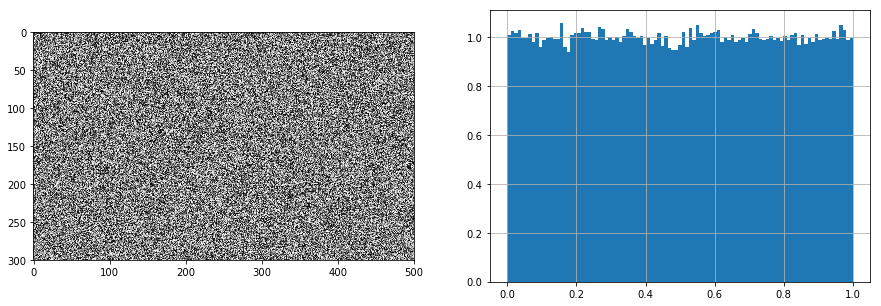

In [13]:
# Bibliotecas para el ejemplo
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
%matplotlib inline

# Imagen (en su caso, debe ser la imagen adjunta)
blurred_image = np.random.rand(300, 500)

# Función auxiliar para mostrar la imagen y el histograma. Los parámetros k y dt son entregados por el slide.
#  im: imagen a mostrar.
def show_imhist(im):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    # Mostrar imagen en tiempo k
    plt.imshow(im, cmap='gray')
    
    # Mostrar histograma
    plt.subplot(1,2,2)
    bins=np.linspace(0,1,100)
    plt.hist(im.flatten() ,bins=bins, normed=True)
    plt.grid(True)
    
    plt.show()

show_imhist(blurred_image)

<div id='instr' />
# 6. Instrucciones:
 
 
* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter` notebook (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados cuando se indique.
* El archivo de entrega debe denominarse Tarea5-rol.tar.gz, y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las bibliotecas extras utilizadas.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código, aunque sí se sugiere discutir aspectos generales con sus compañeros. En caso de sospecha de copia, se citará a los involucrados a defender sus conocimientos de manera presencial, evaluación cuya nota reemplazará la obtenida en la tarea.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.